In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Decision Tree & Naive Bayes Classification/madfhantr.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#Remove uncessary col
data.drop('Loan_ID', axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
#Check null values
print(data.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
data['Dependents'] = data['Dependents'].replace('3+',3).astype(float)

In [12]:
# Fill NaN by cols mean
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
for col in numeric_cols:
  data[col] = data[col].fillna(data[col].mean(), inplace=True)

In [13]:
# Convert Object to Numeric
from sklearn.preprocessing import LabelEncoder

categorical_cols = data.select_dtypes(include = ['object'])
for col in categorical_cols : 
  data[col] = LabelEncoder().fit_transform(data[col])

In [14]:
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [15]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [16]:
#Evaluate the model
y_pred = model.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification Report :\n",classification_report(y_test, y_pred))

Accuracy :  0.6666666666666666
Classification Report :
               precision    recall  f1-score   support

           0       0.67      0.09      0.16        43
           1       0.67      0.97      0.79        80

    accuracy                           0.67       123
   macro avg       0.67      0.53      0.48       123
weighted avg       0.67      0.67      0.57       123



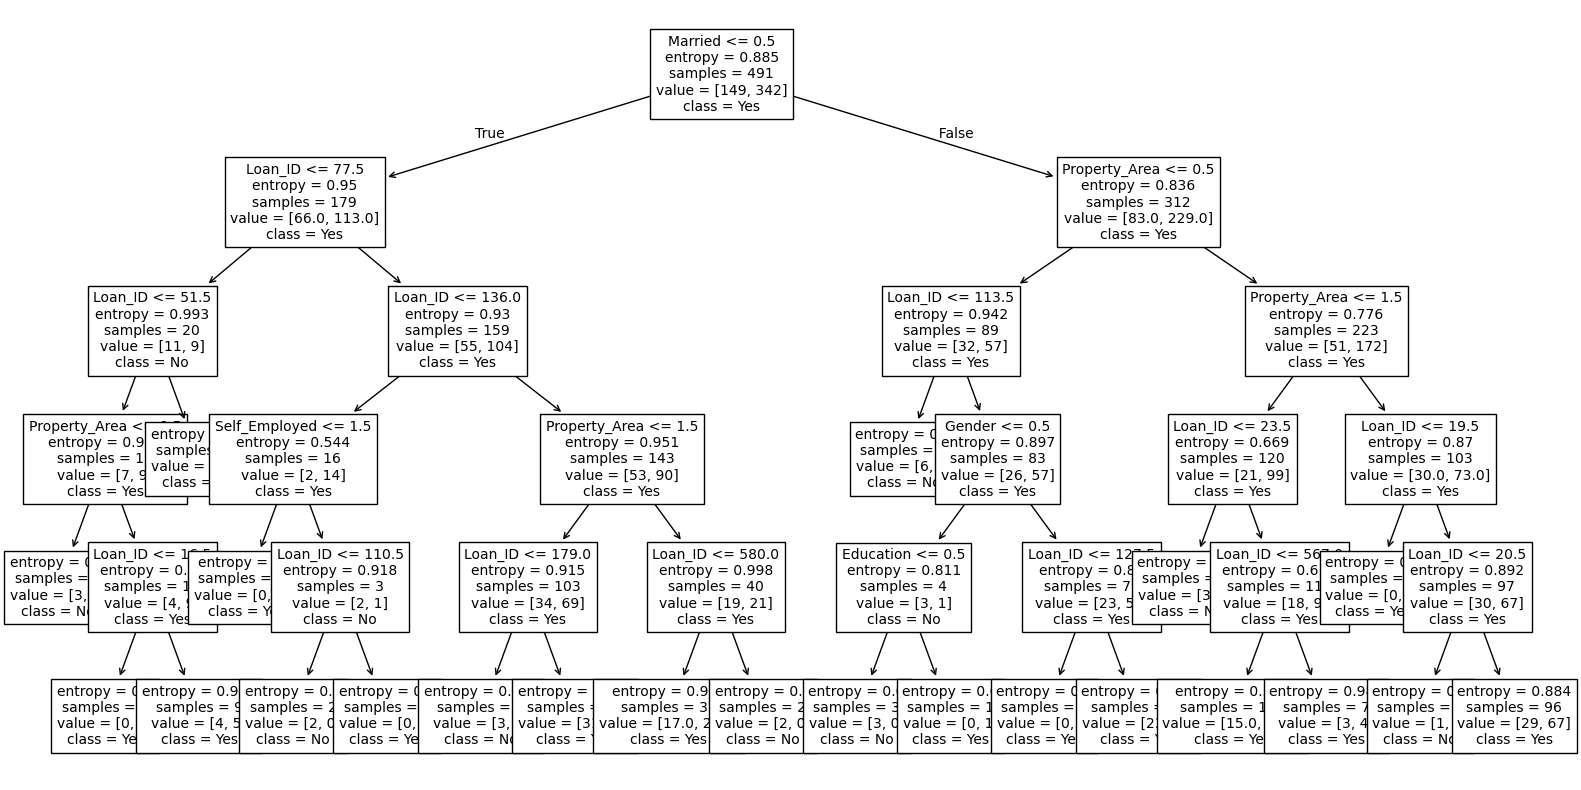

In [18]:
#Plot tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=['No','Yes'], fontsize=10)
plt.show()